In [23]:
%matplotlib inline
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
#iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame
iris = sns.load_dataset('iris')
# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# Let's see how many examples we have of each species
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

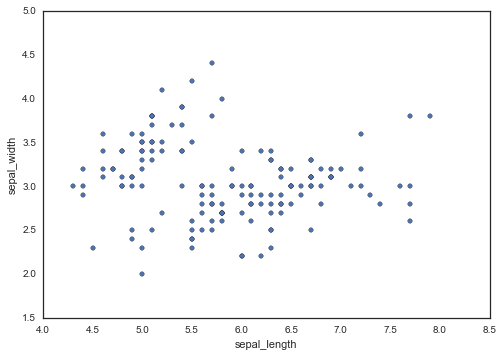

In [26]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

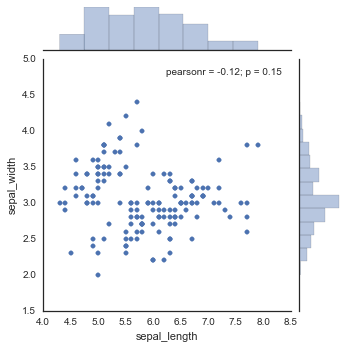

In [27]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

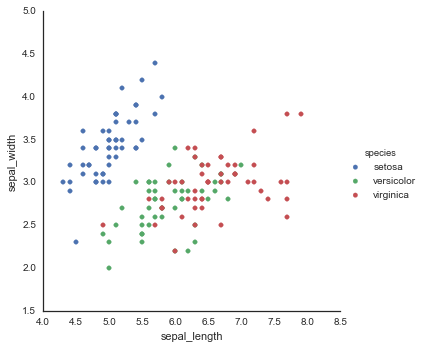

In [29]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

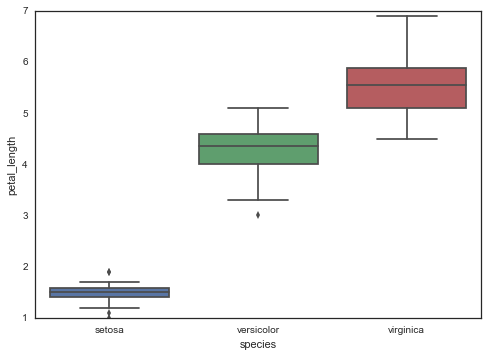

In [30]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris)

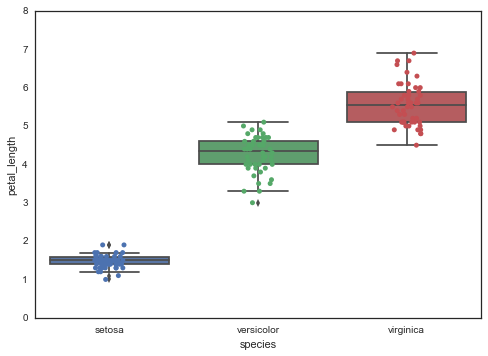

In [31]:

# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

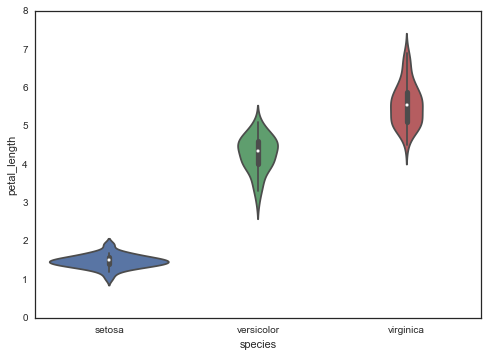

In [32]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

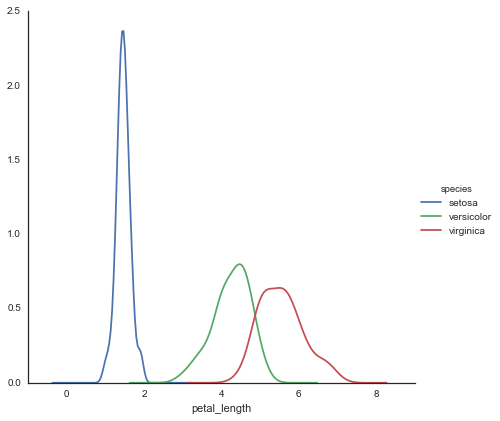

In [33]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

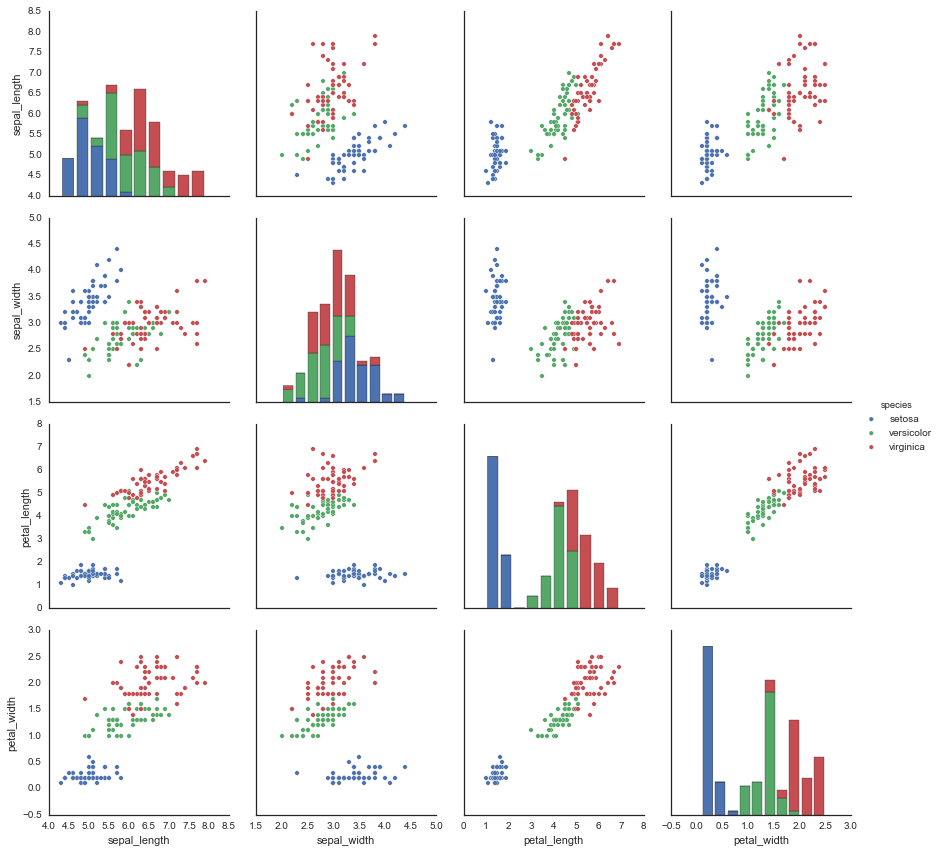

In [37]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="species", size=3)

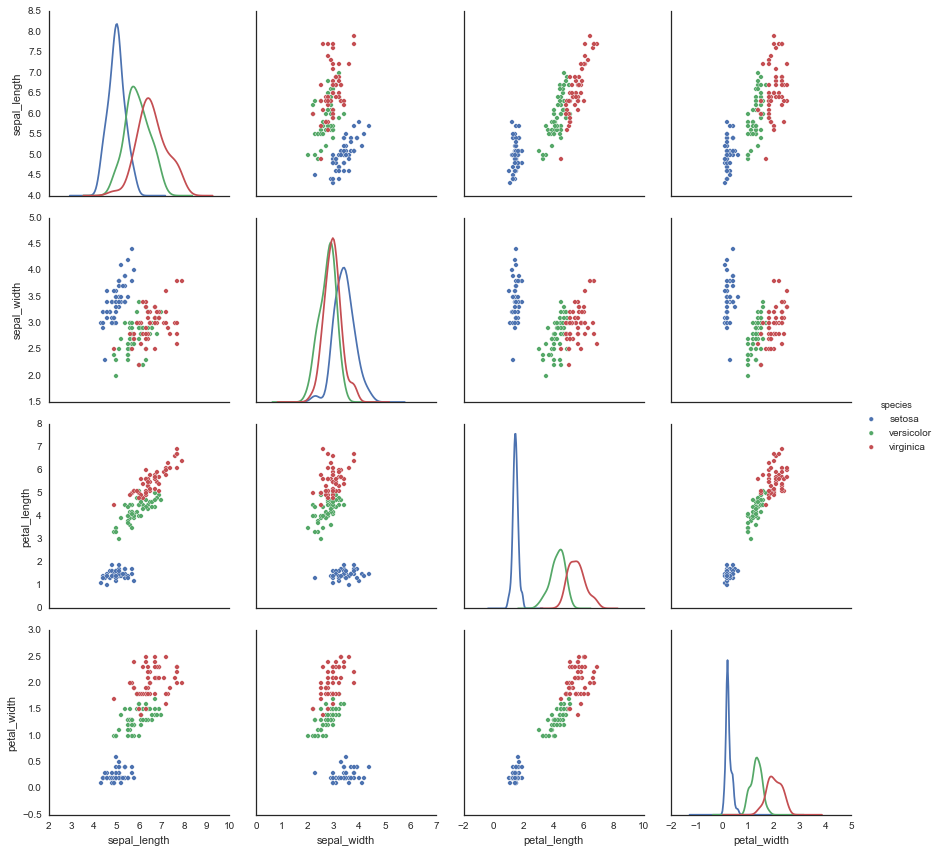

In [38]:

# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="species", size=3, diag_kind="kde")

In [39]:

# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

ValueError: labels ['Id'] not contained in axis